# Assignment 3: Classifiers, Object Recognition

### 1 CIFAR10 Classification using SVM and Random Forest (50 points)

In [1]:
# Paths

CIFAR10_path = "/kaggle/input/cifar10"
A3_Q3_path = "/kaggle/input/a3-w24-images/A3-W24-images"

In [3]:
%pip install opencv-python
%pip install matplotlib
%pip install scikit-learn
%pip install skimage
%pip install tqdm


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      
      *** Please install the `scikit-image` package (instead of `skimage`) ***
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
     ---------------------------------------- 78.3/78.3 kB 4.3 MB/s eta 0:00:00


In [7]:
# Imports
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


from skimage.feature import hog
from skimage import data, exposure

# Use to see progress
from tqdm import tqdm



ModuleNotFoundError: No module named 'matplotlib'

In [3]:
# Helper Method

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
x_train = []
y_train = []

for i in range(1,6):
    file = CIFAR10_path + "/data_batch_" + str(i)
    training_data = unpickle(f'{file}')

    X_train = training_data[b'data'] 
    Y_train = training_data[b'labels'] 
    
    y_train += Y_train

    # Transforming the RGB values into images
    for j in range(len(X_train)):
        x_train.append(X_train[j].reshape(3,32,32).transpose(1,2,0)) 

x_test = []
y_test = []

file = CIFAR10_path + "/test_batch"
testing_data = unpickle(f'{file}')

X_test = testing_data[b'data'] 
Y_test = testing_data[b'labels'] 

y_test += Y_test

# Transforming the RGB values into images
for j in range(len(X_test)):
    x_test.append(X_test[j].reshape(3,32,32).transpose(1,2,0)) 
    
# Transforming into np.array
X_train = np.array(x_train)
Y_train = np.array(y_train) 
X_test = np.array(x_test)
Y_test = np.array(y_test)
        

In [5]:
# Resizing images and grayscale
X_train = [cv2.resize(cv2.cvtColor(x, cv2.COLOR_BGR2GRAY), (64,64)) for x in X_train]
X_test = [cv2.resize(cv2.cvtColor(x, cv2.COLOR_BGR2GRAY), (64,64)) for x in X_test]

In [29]:
# HoG
train_features = []
test_features = []

for i in tqdm(X_train):
    hog_features, hog_image = hog(i, orientations=4, pixels_per_cell=(8, 8), cells_per_block=(4, 4), visualize=True)
    hog_features = hog_features.reshape(-1)
    train_features.append(hog_features)

for i in tqdm(X_test):
    hog_features, hog_image = hog(i, orientations=4, pixels_per_cell=(8, 8), cells_per_block=(4, 4), visualize=True)
    hog_features = hog_features.reshape(-1)
    test_features.append(hog_features)

train_features = np.array(train_features)
test_features = np.array(test_features)

100%|██████████| 10000/10000 [01:47<00:00, 92.68it/s]


In [6]:
# with open('train_features.npy', 'wb') as f:
#     np.save(f, train_features)
# with open('test_features.npy', 'wb') as f:
#     np.save(f, test_features)

train_features = np.load('/kaggle/input/models-and-features/train_features.npy')
test_features = np.load('/kaggle/input/models-and-features/test_features.npy')

In [7]:
svm_classifier = svm.SVC()
# svm_classifier.fit(train_features, Y_train)

with open('/kaggle/input/models-and-features/svm_classifier (1).pkl', 'rb') as f:
    svm_classifier = pickle.load(f)
# with open('svm_classifier.pkl', 'wb') as f:
#     pickle.dump(svm_classifier, f)

In [18]:
with open('svm_classifier.pkl', 'wb') as f:
    pickle.dump(svm_classifier, f)

In [8]:
y_pred = svm_classifier.predict(test_features)

accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.6499

In [ ]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_features[:10000], Y_train[:10000])
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(test_features) 
   
# print classification report 
print(classification_report(Y_test, grid_predictions)) 

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=5, criterion='entropy')

rf_classifier.fit(train_features, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [13]:
# Predict labels for test data
y_pred_rf = rf_classifier.predict(test_features)

# Calculate classification accuracy
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
accuracy_rf

0.3474

### 2 Face Detection (50 points)

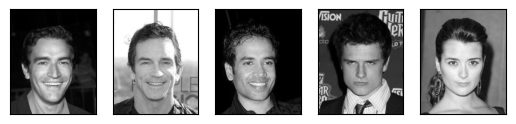

In [70]:
import glob # used to read multiple files

images = [cv2.imread(file) for file in glob.glob(A3_Q3_path + "/Q2 part1/*.jpg")]
images = [cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in images]

images = np.array(images)
images = images.astype('float64')
height, width = images[0].shape

for i in range(5):
    plt.subplot(1,5,i+1), plt.imshow(images[i], cmap = 'gray')
    plt.xticks([]), plt.yticks([])    


In [71]:
# Converting into 3d to 2d
images_vec = [i.flatten() for i in images]
images_vec = np.array(images_vec)
images_vec = images_vec.transpose()


In [72]:
# Normalizing data
norm_images = images_vec - images_vec.mean(axis=0)
# Finding covariance matrix
cov_mat = np.cov(np.transpose(norm_images))

In [73]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

# Sorting eigenvalues and eigenvectors
order_of_importance = np.argsort(eigenvalues)[::-1] 
sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance]

In [74]:
best_eigen_vectors = sorted_eigenvectors[0:5, :]

# Converting to higher dimension 
eigen_faces = best_eigen_vectors.dot(np.transpose(norm_images))

weights = np.transpose(norm_images).dot(np.transpose(eigen_faces)) 


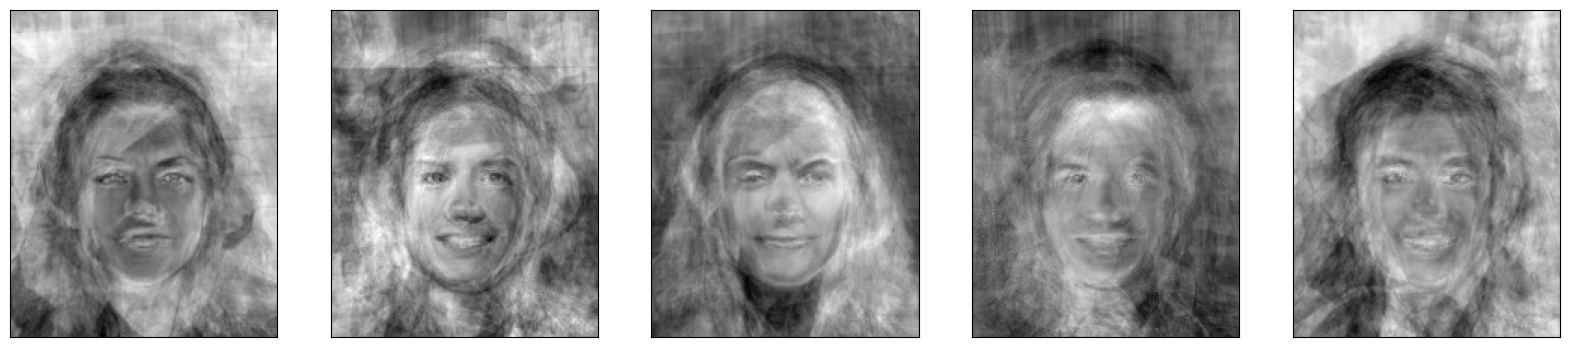

In [75]:
eigen_disp = []
for i in range(5):
    img = eigen_faces[i]
    img = img.reshape(height, width)
    eigen_disp.append(img)

    
plt.figure(figsize=(20, 10))
for i in range(5):
    plt.subplot(1,5,i+1), plt.imshow(eigen_disp[i], cmap = 'gray')
    plt.xticks([]), plt.yticks([])
    
plt.show()

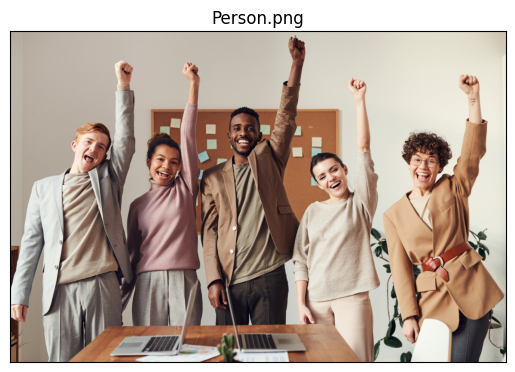

In [76]:
# Use a sliding window method to detect faces in the image2, which is named Person.png
# under folder Q2 part2. Use the result from the previous step to compute the distance in the
# eignspace between the window contents and your training data.

img_path = A3_Q3_path + "/Q2 part2/Person.png"
img_with_peoples = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) 

plt.imshow(img_with_peoples)
plt.title("Person.png"), plt.xticks([]), plt.yticks([])
plt.show()
    

In [1]:
# Sliding window method
def sliding_window(img, thres, window=(650,500), step=16):
    distances_stored = []
    faces_detected = []
    img_out = img.copy()
    for y in range(0, img.shape[0] - window[1] + 1, step):
        for x in range(0, img.shape[1] - window[0] + 1, step):
            img_window = img[y:y+window[1], x:x+window[0]]
            img_window_resized = cv2.resize(img_window, (width, height), interpolation=cv2.INTER_AREA)
            img_window_resized = img_window_resized.astype('float64')
            img_window_flat = img_window_resized.flatten()
            norm_image = img_window_flat - img_window_flat.mean(axis=0)
            weight = np.transpose(norm_image).dot(np.transpose(eigen_faces))
            norm_distances = np.linalg.norm(weights - weight, axis=1)
            min_distance = np.min(norm_distances)
            distances_stored.append(min_distance)

            if min_distance < thres:
                img_out = cv2.rectangle(img_out, (x,y), (x+window[0], y+window[1]), (0,0,0), 3)
                faces_detected.append(img_window_resized)

    print("Max distance: " + str(max(distances_stored)) + " and Min distance: " + str(min(distances_stored)))
    plt.imshow(img_out, cmap='gray')
    plt.title("Detected peoples"), plt.xticks([]), plt.yticks([])
    plt.show()

    if faces_detected:
        plt.figure(figsize=(20, 10))
        for i in range(len(faces_detected)):
            plt.subplot(3, 10, i+1), plt.imshow(faces_detected[i], cmap='gray')
            plt.title("Person " + str(i+1))
            plt.xticks([]), plt.yticks([])
        plt.show()
        
    
    
    
    

Max distance: 85577405.22268917 and Min distance: 2786784.132524571


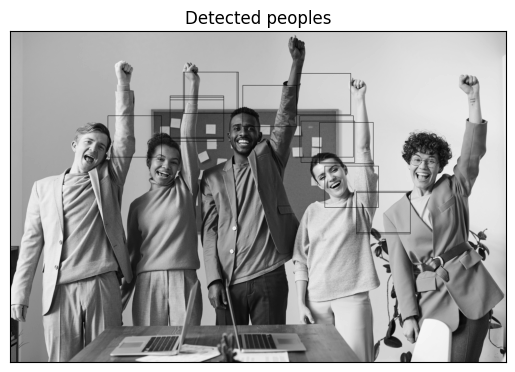

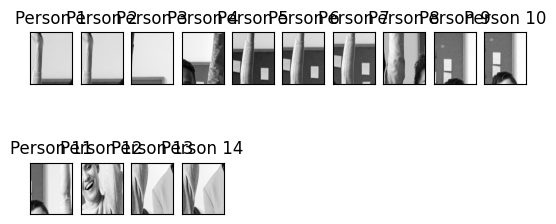

In [78]:
img_with_peoples_gray = cv2.cvtColor(img_with_peoples, cv2.COLOR_BGR2GRAY) 
sliding_window(img_with_peoples_gray, 5000000)
